In [23]:
import pandas as pd
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn import linear_model


%matplotlib inline

In [24]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [25]:
all_data = pd.concat([train.loc[:,'MSSubClass':'SaleCondition'], test.loc[:,'MSSubClass':'SaleCondition']])
price = train["SalePrice"]
num_train = train.shape[0]
num_test = test.shape[0]

#eliminate the columns that contain too much NAN
temp = all_data.isnull().sum()
ratio = temp/all_data.shape[0]
cols = ratio > 0.3
print(cols)
all_data = all_data.drop(all_data.columns[cols],axis =1 )

print(all_data.shape)
all_data.head(10)

MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
MasVnrArea       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
                 ...  
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces       False
FireplaceQu       True
GarageType       False
GarageYrBlt      False
GarageFinish     False
GarageCars       False
GarageArea 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,30,0,320,0,0,700,10,2009,WD,Normal
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,57,0,0,0,0,0,8,2007,WD,Normal
7,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,204,228,0,0,0,350,11,2009,WD,Normal
8,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,205,0,0,0,0,4,2008,WD,Abnorml
9,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,4,0,0,0,0,0,1,2008,WD,Normal


In [26]:
#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])


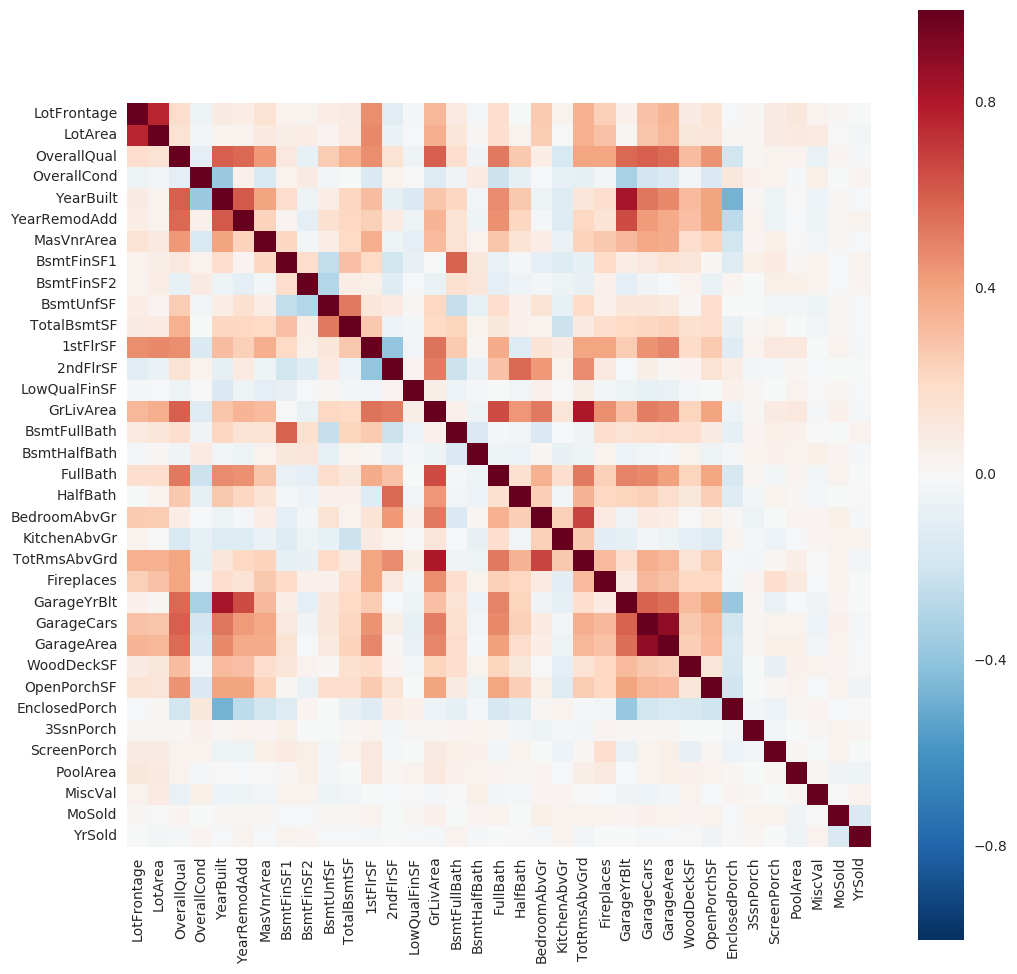

In [28]:
#see the correlation between each feature
import seaborn as sns
corr = all_data.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)

In [29]:
all_data = pd.get_dummies(all_data)

In [13]:
#fill the missing data with mean value
alldata_avg = all_data.fillna(all_data.mean())
alldata_avg.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,...,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.0,0.0
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,...,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.0,0.0
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,...,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.0,0.0
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,...,0.0,0.0,0.0,1.0,0.693147,0.0,0.0,0.0,0.0,0.0
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,...,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.0,0.0


In [30]:
#number of missdata for each columns
missdata = all_data.isnull().sum()
print(missdata)

#the columns contain missing value
miss_cols = all_data.columns[(missdata != 0)]
print(miss_cols)   


#alldata_fill ==> fill the missing value with prediction from other existing value (lasso regression model) 
train_x = all_data[:train.shape[0]]
train_miss = train_x.drop(miss_cols,axis =1)
alldata_fill = all_data

for col in miss_cols:
    miss_train = train_x[col].isnull()
    miss_all = all_data[col].isnull()   
    
    nanTrain = train_miss.drop(train_miss.index[miss_train])
    nanTrain_value = train_x[col].drop(train_miss.index[miss_train])
    reg = linear_model.Lasso(alpha = 0.1)
    miss_data = train_miss.ix[miss_all.index]
    reg.fit(nanTrain,nanTrain_value)
    temp = reg.predict(miss_data)
    alldata_fill[col][miss_all] = temp

MSSubClass                 0
LotFrontage              486
LotArea                    0
OverallQual                0
OverallCond                0
YearBuilt                  0
YearRemodAdd               0
MasVnrArea                23
BsmtFinSF1                 1
BsmtFinSF2                 1
BsmtUnfSF                  1
TotalBsmtSF                1
1stFlrSF                   0
2ndFlrSF                   0
LowQualFinSF               0
GrLivArea                  0
BsmtFullBath               2
BsmtHalfBath               2
FullBath                   0
HalfBath                   0
BedroomAbvGr               0
KitchenAbvGr               0
TotRmsAbvGrd               0
Fireplaces                 0
GarageYrBlt              159
GarageCars                 1
GarageArea                 1
WoodDeckSF                 0
OpenPorchSF                0
EnclosedPorch              0
                        ... 
GarageFinish_RFn           0
GarageFinish_Unf           0
GarageQual_Ex              0
GarageQual_Fa 

C:\Users\Mission\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [31]:
train = alldata_fill[:train.shape[0]]
x_train = alldata_fill[:train.shape[0]]
x_test = alldata_fill[train.shape[0]:]
y_train = np.log(price+1)
alldata_fill.head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.000000,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,3.931826,4.454347,9.555064,5,5,1993,1995,0.000000,6.597146,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,3.044522,4.330733,9.218804,8,5,2004,2005,5.231109,7.222566,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,4.110874,4.227372,9.247925,7,6,1973,1973,5.484797,6.756932,3.496508,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,3.931826,3.951244,8.719481,7,5,1931,1950,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
9,5.252273,3.931826,8.912069,5,6,1939,1950,0.000000,6.747587,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


[ 11.71215776  11.94404169  12.1395674  ...,  12.05279116  11.70203932
  12.28336082]


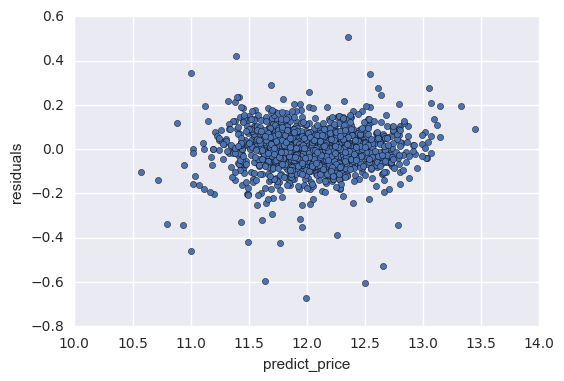

In [32]:
#fit into regrssion model
from sklearn import linear_model

Ridgemodel = linear_model.RidgeCV(alphas=[0.02,1.0,10.0],normalize = True)
Ridgemodel.fit(x_train,y_train)
y_pred = Ridgemodel.predict(x_test)
print(y_pred)

preds = pd.DataFrame({"predict_price":Ridgemodel.predict(x_train),"price":y_train})
preds["residuals"] = preds["price"] - preds["predict_price"]
preds.plot(x = "predict_price",y = "residuals", kind = "scatter")

In [ ]:
Models
Now we are going to use regularized linear regression models from the scikit learn module.

C:\Users\Mission\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Mission\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Mission\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Mission\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Mission\Anaconda3\l

[0.12769490525045896, 0.19895170419528688, 0.2209329613219288, 0.26354487227461776, 0.26818292145415978, 0.30482464406022391]


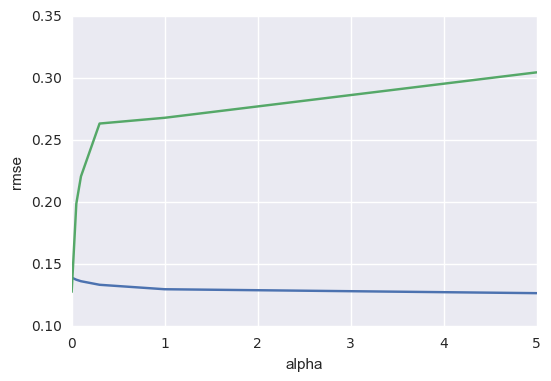

In [34]:
from sklearn.cross_validation import cross_val_score
from sklearn import linear_model
from sklearn.linear_model import Ridge, RidgeCV

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, x_train, y_train, scoring="mean_squared_error", cv = 5))
    return(rmse)

alphas = [0.0001,0.05, 0.1, 0.3, 1,5]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean()  for alpha in alphas]

cv_lasso = [rmse_cv(linear_model.Lasso(alpha = alpha, max_iter = 1500)).mean()  for alpha in alphas]
print(cv_lasso)

cv_ridge = pd.Series(cv_ridge, index = alphas)
plt.plot(alphas, cv_ridge)
plt.plot(alphas, cv_lasso)
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.legend()
plt.show()

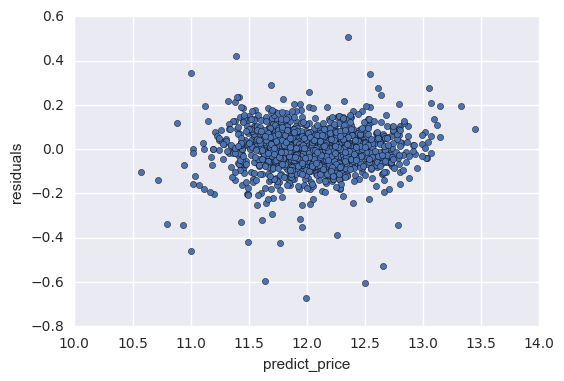

In [35]:
#look at the residuals as well:
preds = pd.DataFrame({"predict_price":Ridgemodel.predict(x_train),"price":y_train})
preds["residuals"] = preds["price"] - preds["predict_price"]
preds.plot(x = "predict_price",y = "residuals", kind = "scatter")


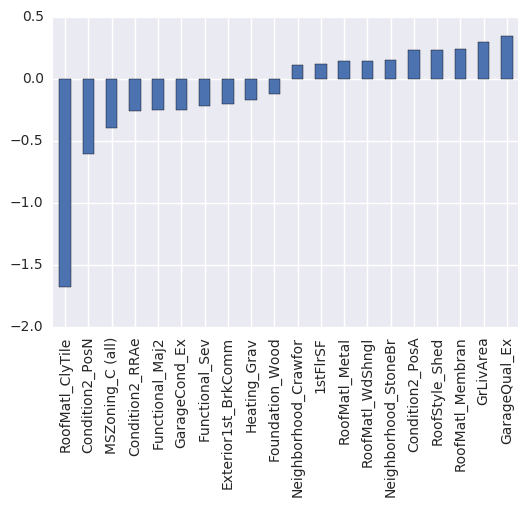

In [46]:
#take a look at what the most important coefficients are:
coef = pd.Series(Ridgemodel.coef_, index  = x_train.columns)
key_coef = pd.concat([coef.sort_values().head(10), coef.sort_values().tail(10)])
key_coef.plot(kind = "bar")



In [ ]:
DNN model with Kera

In [47]:
import keras
import pickle
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import SGD
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV


##define base model
def base_model(optimizer='rmsprop', init='glorot_uniform'):
     model = Sequential()
     model.add(Dense(128, input_dim=270, init='normal', activation='relu'))
     model.add(Dropout(0.2))
     model.add(Dense(64, init=init, activation='relu'))
     model.add(Dropout(0.2))
     model.add(Dense(64, init=init, activation='relu'))
     model.add(Dropout(0.2))
     model.add(Dense(1, init=init))
     model.compile(loss='mean_squared_error', optimizer=optimizer)       
     return model

y_train = np.array(y_train)
x_train = np.array(x_train)
x_test = np.array(x_test)

#create regresion model
model = KerasRegressor(build_fn=base_model,batch_size=5,verbose=0)

#gridsearch epoch,batch size and optimizer
optimizers = ['sgd','adam','RMSprop']
inits = ['normal','uniform','glorot_uniform']
epochs = [100]
batches = [5,10,20]
param_grids = dict(optimizer = optimizers, init = inits,nb_epoch = epochs ,batch_size = batches) 

grid = GridSearchCV(estimator = model, param_grid = param_grids )
grid_result = grid.fit(x_train,y_train)

#summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))





Using Theano backend.


Best: 15.053585 using {'batch_size': 20, 'nb_epoch': 100, 'optimizer': 'RMSprop', 'init': 'uniform'}
nan (nan) with: {'batch_size': 5, 'nb_epoch': 100, 'optimizer': 'sgd', 'init': 'normal'}
0.956395 (1.118758) with: {'batch_size': 5, 'nb_epoch': 100, 'optimizer': 'adam', 'init': 'normal'}
3.415858 (0.310420) with: {'batch_size': 5, 'nb_epoch': 100, 'optimizer': 'RMSprop', 'init': 'normal'}
nan (nan) with: {'batch_size': 5, 'nb_epoch': 100, 'optimizer': 'sgd', 'init': 'uniform'}
1.135959 (0.443498) with: {'batch_size': 5, 'nb_epoch': 100, 'optimizer': 'adam', 'init': 'uniform'}
0.377595 (0.214253) with: {'batch_size': 5, 'nb_epoch': 100, 'optimizer': 'RMSprop', 'init': 'uniform'}
nan (nan) with: {'batch_size': 5, 'nb_epoch': 100, 'optimizer': 'sgd', 'init': 'glorot_uniform'}
0.163684 (0.009757) with: {'batch_size': 5, 'nb_epoch': 100, 'optimizer': 'adam', 'init': 'glorot_uniform'}
5.502395 (0.798548) with: {'batch_size': 5, 'nb_epoch': 100, 'optimizer': 'RMSprop', 'init': 'glorot_unifor

NameError: name 'clf' is not defined

In [50]:
score = np.sqrt(mean_squared_error(y_train, grid_result.best_estimator_.predict(x_train)))
print(score)

y_pred_keras = grid_result.best_estimator_.predict(x_test)


3.22887043905


In [52]:
import csv

def outfile(y_predict, h_id, file_name):
    result = [["Id","SalePrice"]]
    num = len(y_predict)    
    for it in range(num):
        
        ans = [h_id[it]  , str(y_predict[it]) ]
        result.append(ans)
    
    csvfile = open(file_name, 'w',newline='')
    csvwriter = csv.writer(csvfile)
    for item in result:
        csvwriter.writerow(item)
    csvfile.close()

house_ID = test["Id"]   
outfile(y_pred_keras,house_ID,'outfile_keras.csv')